# SPAM SMS CLASSIFICATION

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [25]:
# Loading the dataset
df = pd.read_csv('G:\ML\Projects\SPAM CLASSIFICATION\Spam SMS Collection.txt', sep='\t', names=['label', 'message'])

### Exploratory Data Analysis (EDA)


In [26]:
df.shape

(5572, 2)

In [27]:
df.dtypes

label      object
message    object
dtype: object

In [28]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
df.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [12]:
df.describe(include='object')

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Note: No NaN values in the dataset

ENCODING THE CLASS VARIABLES HAM AND SPAM TO 0 AND 1 RESPPECTIVELY

In [33]:

# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df['label']= label_encoder.fit_transform(df['label']) 
print(df.head())

   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


IMPORTING LIBRARIES NECESSARY FOR VISUALIZATION OF IMBALANCED DATASET

In [34]:
# 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

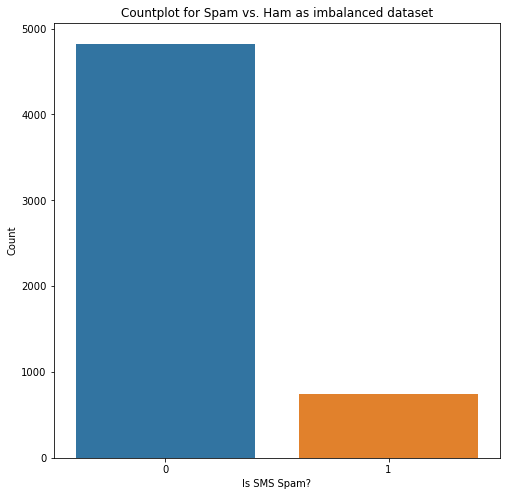

In [35]:
# Countplot for Spam vs. Ham as imbalanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=df)
p = plt.title('Countplot for Spam vs. Ham as imbalanced dataset')
p = plt.xlabel('Is SMS Spam?')
p = plt.ylabel('Count')

Insight: From the above countplot, it is evident that the dataset is imbalanced.




### Feature Engineering

 Handling imbalanced dataset using Oversampling



In [46]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.86, 0.14], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=len(df), random_state=10)

print('Original dataset shape %s' % Counter(y))


ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 4792, 1: 780})
Resampled dataset shape Counter({0: 4792, 1: 4792})


In [48]:
#creating a new feature word count

df['word_count'] = df['message'].apply(lambda x: len(x.split()))
df

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,30
5568,0,Will ü b going to esplanade fr home?,8
5569,0,"Pity, * was in mood for that. So...any other s...",10
5570,0,The guy did some bitching but I acted like i'd...,26


g:\Anaconda\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
g:\Anaconda\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


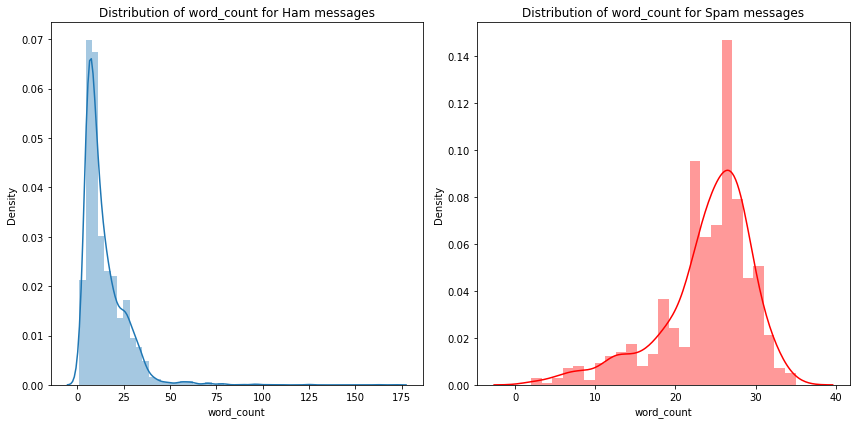

In [52]:
plt.figure(figsize=(12, 6))

# 1-row, 2-column, go to the first subplot
plt.subplot(1, 2, 1)
g = sns.distplot(a=df[df['label']==0].word_count)
p = plt.title('Distribution of word_count for Ham messages')

# 1-row, 2-column, go to the second subplot
plt.subplot(1, 2, 2)
g = sns.distplot(a=df[df['label']==1].word_count, color='red')
p = plt.title('Distribution of word_count for Spam messages')

plt.tight_layout()
plt.show()


Insight: Spam messages word_count fall in the range of 15-30 words, whereas majority of the Ham messages fall in the range of below 25 words.

In [56]:
# Creating feature contains_currency_symbol
def currency(x):
  currency_symbols = ['€', '$', '¥', '£', '₹']
  for i in currency_symbols:
    if i in x:
      return 1
  return 0

df['contains_currency_symbol'] = df['message'].apply(currency)
df


,label,message,word_count,contains_currency_symbol
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,30,1
5568,0,Will ü b going to esplanade fr home?,8,0
5569,0,"Pity, * was in mood for that. So...any other s...",10,0
5570,0,The guy did some bitching but I acted like i'd...,26,0


<AxesSubplot:xlabel='contains_currency_symbol', ylabel='count'>

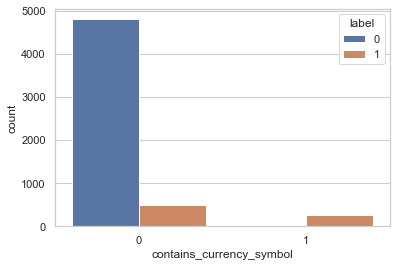

In [58]:
import seaborn as sns
sns.set_theme(style="whitegrid")

sns.countplot(data=df, x=df["contains_currency_symbol"],hue="label")



Insight: Almost 1/3 of Spam messages contain currency symbols, and currency symbols are rarely used in Ham messages.

In [60]:

# Creating feature contains_number
def numbers(x):
  for i in x:
    if ord(i)>=48 and ord(i)<=57:
      return 1
  return 0

df['contains_number'] = df['message'].apply(numbers)

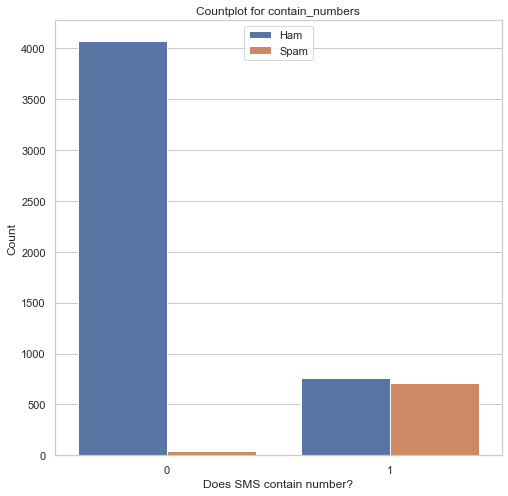

In [61]:

# Countplot for contains_number
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_number', data=df, hue='label')
p = plt.title('Countplot for contain_numbers')
p = plt.xlabel('Does SMS contain number?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

Insight: It is evident that most of the Spam messages contain numbers, and majority of the Ham messages do not contain numbers. 

### DATA CLEANING 

In [62]:
# Importing essential libraries for performing NLP
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\csdin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\csdin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



• Removing special character and numbers using regular expression

• Converting the entire sms into lower case

• Tokenizing the sms by words

• Removing the stop words

• Lemmatizing the words

• Joining the lemmatized words

• Building a corpus of messages

In [63]:

# Cleaning the messages
corpus = []
wnl = WordNetLemmatizer()

for sms_string in list(df.message):

  # Cleaning special character from the sms
  message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms_string)

  # Converting the entire sms into lower case
  message = message.lower()

  # Tokenizing the sms by words
  words = message.split()

  # Removing the stop words
  filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Lemmatizing the words
  lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]

  # Joining the lemmatized words
  message = ' '.join(lemmatized_words)

  # Building a corpus of messages
  corpus.append(message)

In [116]:
# Creating the Bag of Words model(The words are now converted to vectors)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names()

# Extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors, columns=feature_names)
y = df['label']

g:\Anaconda\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Model Building & Evaluation

METRIC: F1 SCORE

• Multinomail Naive Bayes: 0.896

• Decision Tree: 0.86

• Random Forest (Ensemble): 0.869

• Voting (Multinomial Naive Bayes + Decision Tree): 0.98

In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    MULTINOMIAL NAIVE BAYES

• Naive Bayes is a classification algorithm that is based on the Bayes theorem.

• The naive Bayes algorithm uses this theorem to make predictions by calculating the probabilities of each class, given    the input data, and then selecting the class with the highest probability as the predicted class. 

• It makes the assumption that the features in the input data are independent of each other, which allows it to make predictions based on individual features rather than considering the entire input at once.

• Overall, the naive Bayes algorithm is a simple yet effective method for classifying data, and it is widely used in a variety of applications, such as spam filtering and text classification.

In [119]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for MNB model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for MNB model: 0.896 ---
Standard Deviation: 0.015


In [120]:
# Classification report for MNB model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

print('--- Classification report for MNB model ---')
print(classification_report(y_test, y_pred))

--- Classification report for MNB model ---
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.98      0.87      0.92       149

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



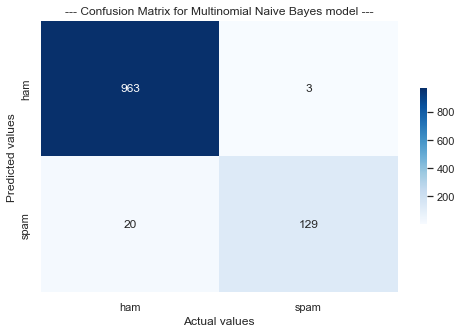

In [121]:
# Confusion matrix of MNB model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Multinomial Naive Bayes model ---')

        DECISION TREE CLASSIFIER

• A decision tree classifier is a machine learning algorithm that uses a decision tree to make predictions.It is a flowchart-like tree structure that models the decisions and possible outcomes of a situation.

• When making a prediction, the decision tree classifier takes the input data and follows the path through the tree that corresponds to the feature values in the input data. This path leads to a leaf node, which contains the predicted class for that combination of feature values.

• Decision tree classifiers are popular because they are easy to understand and interpret.However, they can be prone to overfitting, which means that they may not generalize well to new data.



In [122]:
# Fitting Random Forest to the Training set
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv = cross_val_score(dt, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for Decision Tree model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for Decision Tree model: 0.869 ---
Standard Deviation: 0.02


In [123]:
# Classification report for Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('--- Classification report for Decision Tree model ---')
print(classification_report(y_test, y_pred))

--- Classification report for Decision Tree model ---
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       966
           1       0.89      0.85      0.87       149

    accuracy                           0.97      1115
   macro avg       0.93      0.92      0.93      1115
weighted avg       0.97      0.97      0.97      1115



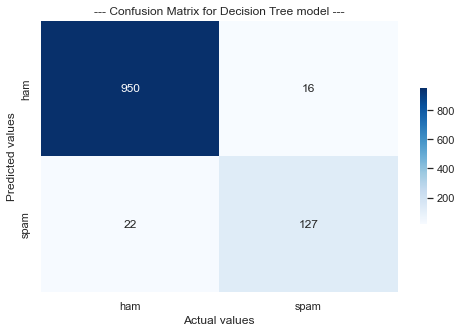

In [124]:
# Confusion matrix of Decision Tree model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Decision Tree model ---')

        RANDOM FOREST CLASSIFIER

• A random forest classifier is a machine learning algorithm that uses a large number of decision trees to make predictions.

• It is called a "random" forest because it uses random subsets of the data to train each individual decision tree, and the final prediction is made by combining the predictions of all of the individual trees.

• Random forest classifiers are popular because they also resistant to overfitting, which makes them a good choice for many real-world applications.

In [125]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
cv = cross_val_score(rf, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for Random Forest model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for Random Forest model: 0.902 ---
Standard Deviation: 0.021


In [126]:
# Classification report for Random Forest model
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('--- Classification report for Random Forest model ---')
print(classification_report(y_test, y_pred))

--- Classification report for Random Forest model ---
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.88      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



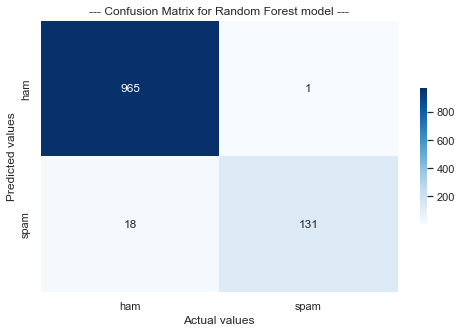

In [127]:
# Confusion matrix of Random Forest model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Random Forest model ---')

        VOTING CLASSIFIER

• A VotingClassifier is a machine learning ensemble method that combines the predictions of multiple individual models in order to make a final prediction. It is called a "voting" classifier because each individual model gets a "vote" on the final prediction, and the prediction that gets the most votes is the one that the VotingClassifier outputs.

In [128]:
# Fitting Decision Tree and MNB to VotingClassifier
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier([('decision_tree', dt), ('m_naive_bayes', mnb)], weights=[2,1])
cv = cross_val_score(vc, X, y, cv=10, scoring='f1')

print('--- Average F1-Score for VotingClassifier model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for VotingClassifier model: 0.865 ---
Standard Deviation: 0.028


Note: Voting algorithm did not out-perform Random Forest algorithm, hence Random Forest algorithm is selected for predicting the results of this problem statement.


### Making Predictions

In [130]:

def predict_spam(sample_message):
  sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
  sample_message = sample_message.lower()
  sample_message_words = sample_message.split()
  sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
  final_message = [wnl.lemmatize(word) for word in sample_message_words]
  final_message = ' '.join(final_message)

  temp = tfidf.transform([final_message]).toarray()
  return rf.predict(temp)

In [131]:
# Prediction 1 - Lottery text message
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


g:\Anaconda\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [132]:
# Prediction 2 - Casual text chat
sample_message = 'Came to think of it. I have never got a spam message before.'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


g:\Anaconda\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [133]:
# Prediction 3 - Transaction confirmation text message
sample_message = 'Sam, your rent payment for Jan 19 has been received. $1,300 will be drafted from your Wells Fargo Account ******0000 within 24-48 business hours. Thank you!'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


g:\Anaconda\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [134]:
# Predicting values 4 - Feedback message
sample_message = 'Tammy, thanks for choosing Carl’s Car Wash for your express polish. We would love to hear your thoughts on the service. Feel free to text back with any feedback. Safe driving!'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

Gotcha! This is a SPAM message.


g:\Anaconda\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [137]:
# Predicting values 5 - Taking string as an input from the user 
message=str(input("Enter the message:"))

if predict_spam(message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')